In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('product.csv')

In [3]:
df.shape

(8471220, 8)

In [4]:
df.dtypes

order_id        object
user_id         object
page_id         object
product         object
site_version    object
time            object
title           object
target           int64
dtype: object

In [5]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0


In [25]:
df['date']= pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

TypeError: <class 'datetime.time'> is not convertible to datetime

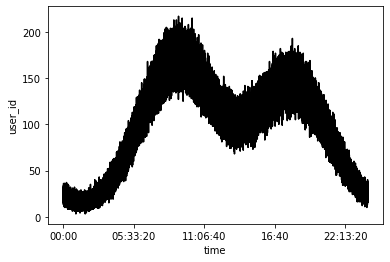

In [10]:
time_distribution = df.groupby('time')[['user_id']].count().reset_index()
sns.lineplot(x = 'time', y = 'user_id', data = time_distribution,color='black')

In [22]:
def ampm(time):
    if time.hour <12:
        return 'am'
    else:
        return 'pm'

In [23]:
df['ampm'] = df['time'].apply(ampm)

In [24]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target,date,ampm
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,2019-01-11,am
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2019-01-09,am
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2019-01-09,am


In [30]:
def month(date):
    return date.month

def year(date):
    return date.year

In [31]:
df['month'] = df['date'].apply(month)
df['year'] = df['date'].apply(year)

**EDA**

In [ ]:
gb_products = df.groupby('product')[['user_id']].count().reset_index()
gb_site_version = df.groupby('site_version')[['user_id']].count().reset_index()
gb_banner = df.groupby('title')[['user_id']].count().reset_index()

In [ ]:
fig = plt.figure()
ax = sns.barplot(x = 'product', y = 'user_id', data = gb_products, palette='rocket')
ax.set(xlabel = 'Product Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Product')
plt.show()

In [ ]:
fig = plt.figure()
ax = sns.barplot(x = 'site_version', y = 'user_id', data = gb_site_version, palette='rocket')
ax.set(xlabel = 'Site Version', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Site Version')
plt.show()

In [ ]:
fig = plt.figure()
ax = sns.barplot(x = 'title', y = 'user_id', data = gb_banner, palette='rocket')
ax.set(xlabel = 'Event Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Event Type')
plt.show()

In [ ]:
gb_time = df.groupby('date')[['user_id']].count().reset_index(level=0)

In [ ]:
gb_time

In [ ]:
sns.set(style="whitegrid")

fig = plt.figure(figsize = (15,5))
ax = sns.lineplot(x="date", y="user_id",data=gb_time, color = 'blue')
ax.set_title('Dataset Experience Distribution by Date')


plt.tight_layout()
plt.show()

**Modeling**

In [33]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target,date,ampm,month,year
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,2019-01-11,am,1,2019
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2019-01-09,am,1,2019
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2019-01-09,am,1,2019


In [40]:
var_list = df.columns.to_list()
var_list.remove('order_id')
var_list.remove('user_id')
var_list.remove('time')
var_list.remove('page_id')
var_list.remove('date')
var_list.remove('target')
var_list

df_with_dummies = pd.get_dummies(df,columns=var_list,drop_first=True)

In [66]:
df_with_dummies[:3]

,order_id,user_id,page_id,time,target,date,product_clothes,product_company,product_sneakers,product_sports_nutrition,site_version_mobile,title_banner_show,title_order,ampm_pm,month_2,month_3,month_4,month_5
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,09:24:43,0,2019-01-11,0,0,1,0,0,0,0,0,0,0,0,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,09:38:51,0,2019-01-09,0,0,1,0,0,1,0,0,0,0,0,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,09:12:45,0,2019-01-09,0,0,0,1,0,1,0,0,0,0,0,0


In [48]:
X = df_with_dummies.drop(columns=['target','order_id','user_id',
                                  'page_id','time','date'], axis=1)
y = df_with_dummies['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [51]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [61]:
confusion_matrix(y_test, y_pred)

array([[2466863,       0],
       [      0,   74503]])